<a href="https://colab.research.google.com/github/svgoudar/My-Data-Science-Roadmap/blob/main/ML/Supervised%20Learning/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

### **Topic**: Introduction to Supervised Learning with Linear Regression

**Objective**:
Understand the overall process of supervised learning using a real-world example—**predicting house prices based on house size**.

---

### **Key Concepts Covered**:

1. **Supervised Learning Overview**:

   * In supervised learning, the model is trained using input-output pairs (data with “right answers”).
   * The goal is to learn a function that maps inputs (features) to outputs (targets).

2. **Example Problem**:
   Predict the **price** of a house based on its **size** using a dataset from Portland, USA.

3. **Linear Regression Model**:

   * A simple model that fits a straight line to the data.
   * Useful for predicting continuous values like price.
   * If a house is 1250 sq. ft., the model uses the line to predict its price, say **\$220,000**.

4. **Terminology**:

   * **Regression**: Predicts numerical values (e.g., price).
   * **Classification**: Predicts discrete categories (e.g., cat vs. dog).
   * **Training Set**: Data used to train the model (inputs + known outputs).
   * **Input Feature**: Denoted as **x** (e.g., house size).
   * **Target Variable**: Denoted as **y** (e.g., house price).
   * **Training Example**: A pair **(x, y)**.
   * **Number of Training Examples**: Denoted **m** (e.g., m = 47).
   * **Notation for ith Example**:

     * Input: $x^{(i)}$
     * Output: $y^{(i)}$

5. **Visualization**:

   * Data can be represented as a **scatter plot** (size vs. price) or a **data table** (rows of $x$ and $y$).

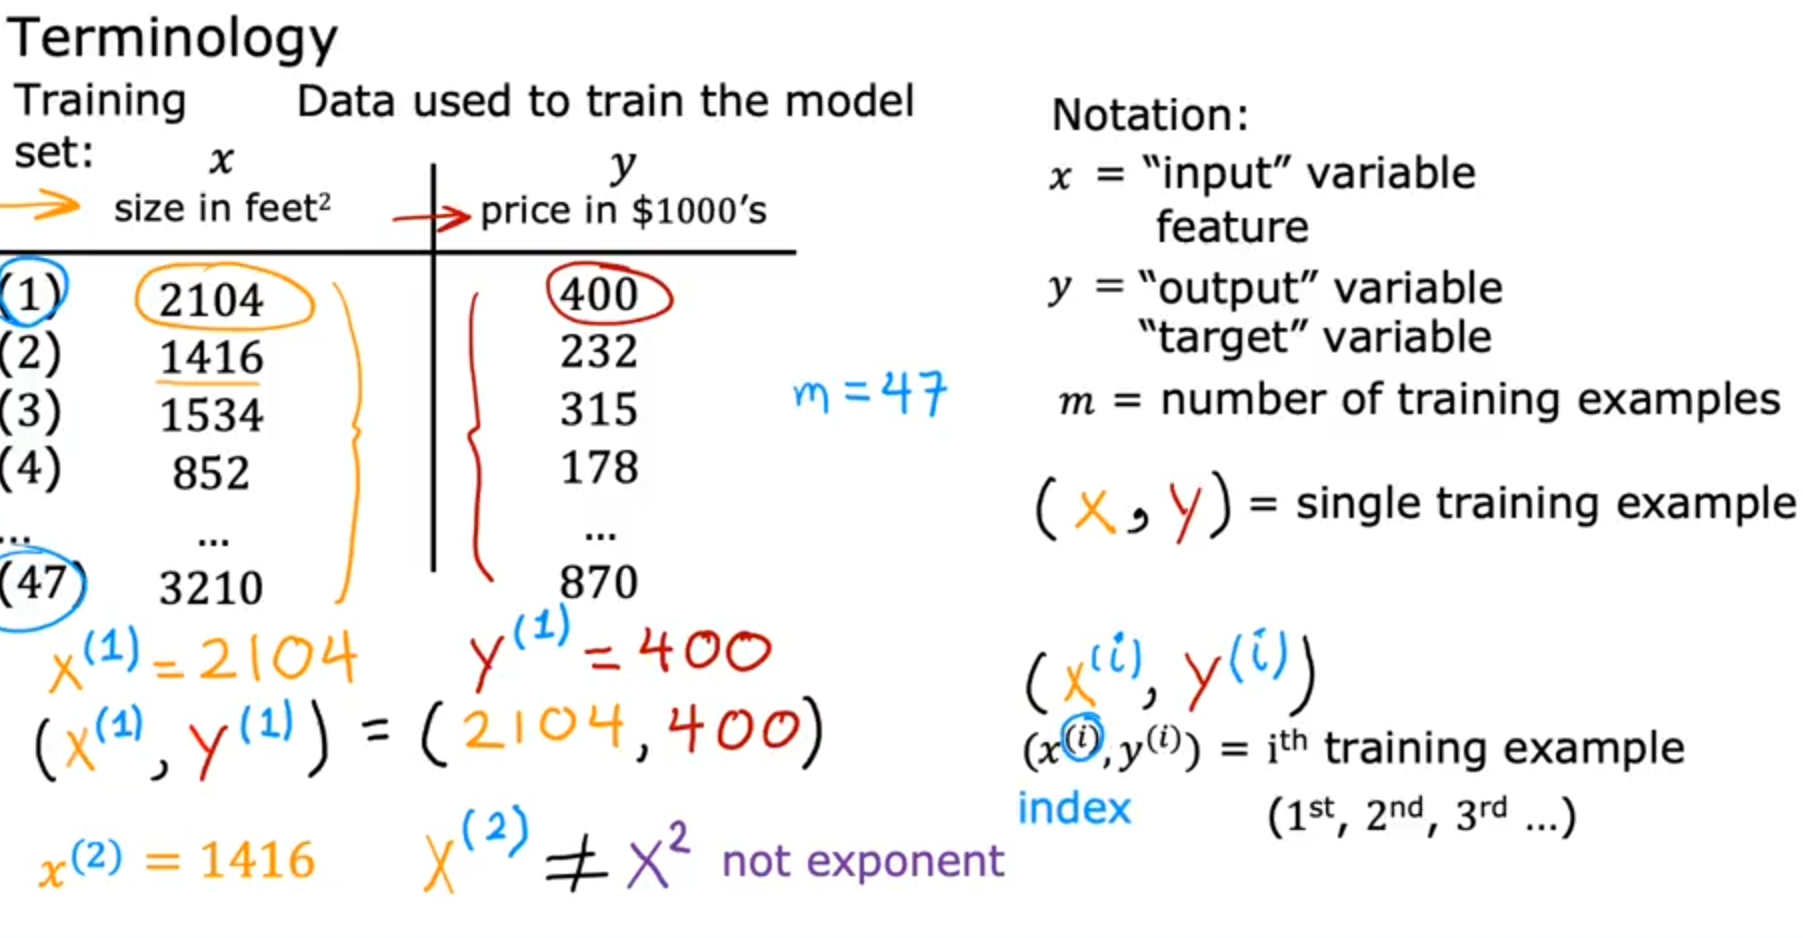

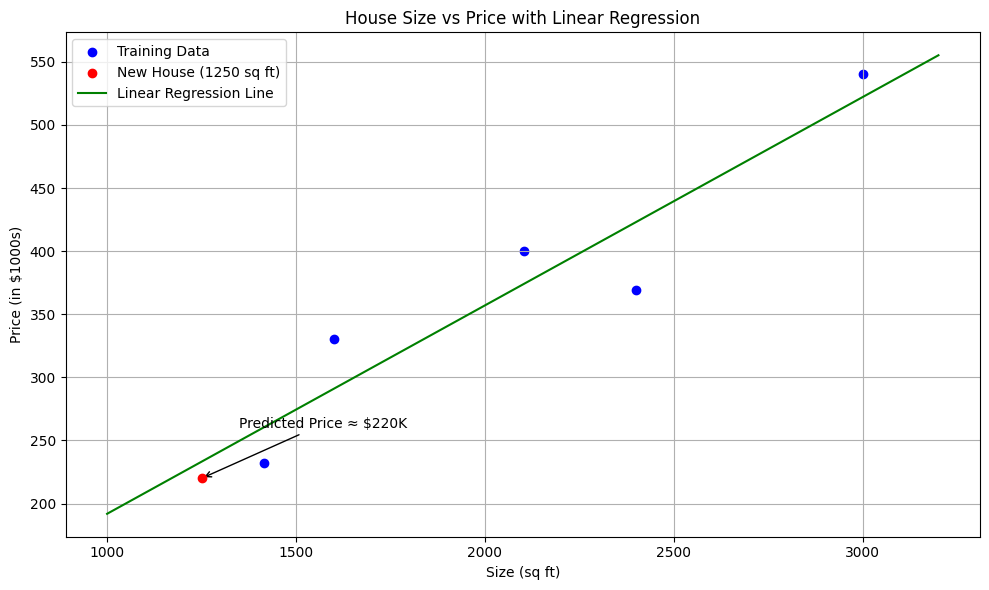

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample training data (size in square feet, price in thousands of dollars)
house_sizes = np.array([2104, 1600, 2400, 1416, 3000, 1250])
house_prices = np.array([400, 330, 369, 232, 540, 220])  # last one is made-up for prediction demo

# Fit a simple linear regression model for the line
coefficients = np.polyfit(house_sizes[:-1], house_prices[:-1], 1)  # exclude the last point
model = np.poly1d(coefficients)

# Generate points for the regression line
x_line = np.linspace(1000, 3200, 100)
y_line = model(x_line)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(house_sizes[:-1], house_prices[:-1], color='blue', label='Training Data')
plt.scatter(house_sizes[-1], house_prices[-1], color='red', label='New House (1250 sq ft)', zorder=5)
plt.plot(x_line, y_line, color='green', label='Linear Regression Line')

# Annotation for new prediction
plt.annotate('Predicted Price ≈ $220K',
             xy=(1250, 220),
             xytext=(1350, 260),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

# Labels and title
plt.title('House Size vs Price with Linear Regression')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price (in $1000s)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


Here’s a clear and concise **summary** of the video on how supervised learning works with a focus on **linear regression**:

---

### 🎯 **Topic**: How Supervised Learning Works — Introducing Linear Regression

---

### 🧠 **What Happens in Supervised Learning?**

1. **Training Set**:

   * Contains both **input features** (e.g., house size) and **output targets** (e.g., house price).
   * These targets are the "correct answers" used to train the model.

2. **Learning Process**:

   * The training set is fed into a **supervised learning algorithm**.
   * The algorithm **learns a function** $f$, also called a **model**, that maps input $x$ to predicted output $\hat{y}$ ("y-hat").

3. **Function and Prediction**:

   * $f(x) = \hat{y}$: the model's prediction
   * $y$: actual target value
   * $\hat{y}$: predicted value by the model
   * Example: If you input a new house size, the model outputs the **estimated price**.

4. **Linear Function Representation**:

   * The function is assumed to be **linear**:
     $f_{w,b}(x) = wx + b$

     * $w$ = weight (slope)
     * $b$ = bias (intercept)
   * This is a **straight line**, hence the term **linear regression**.

---


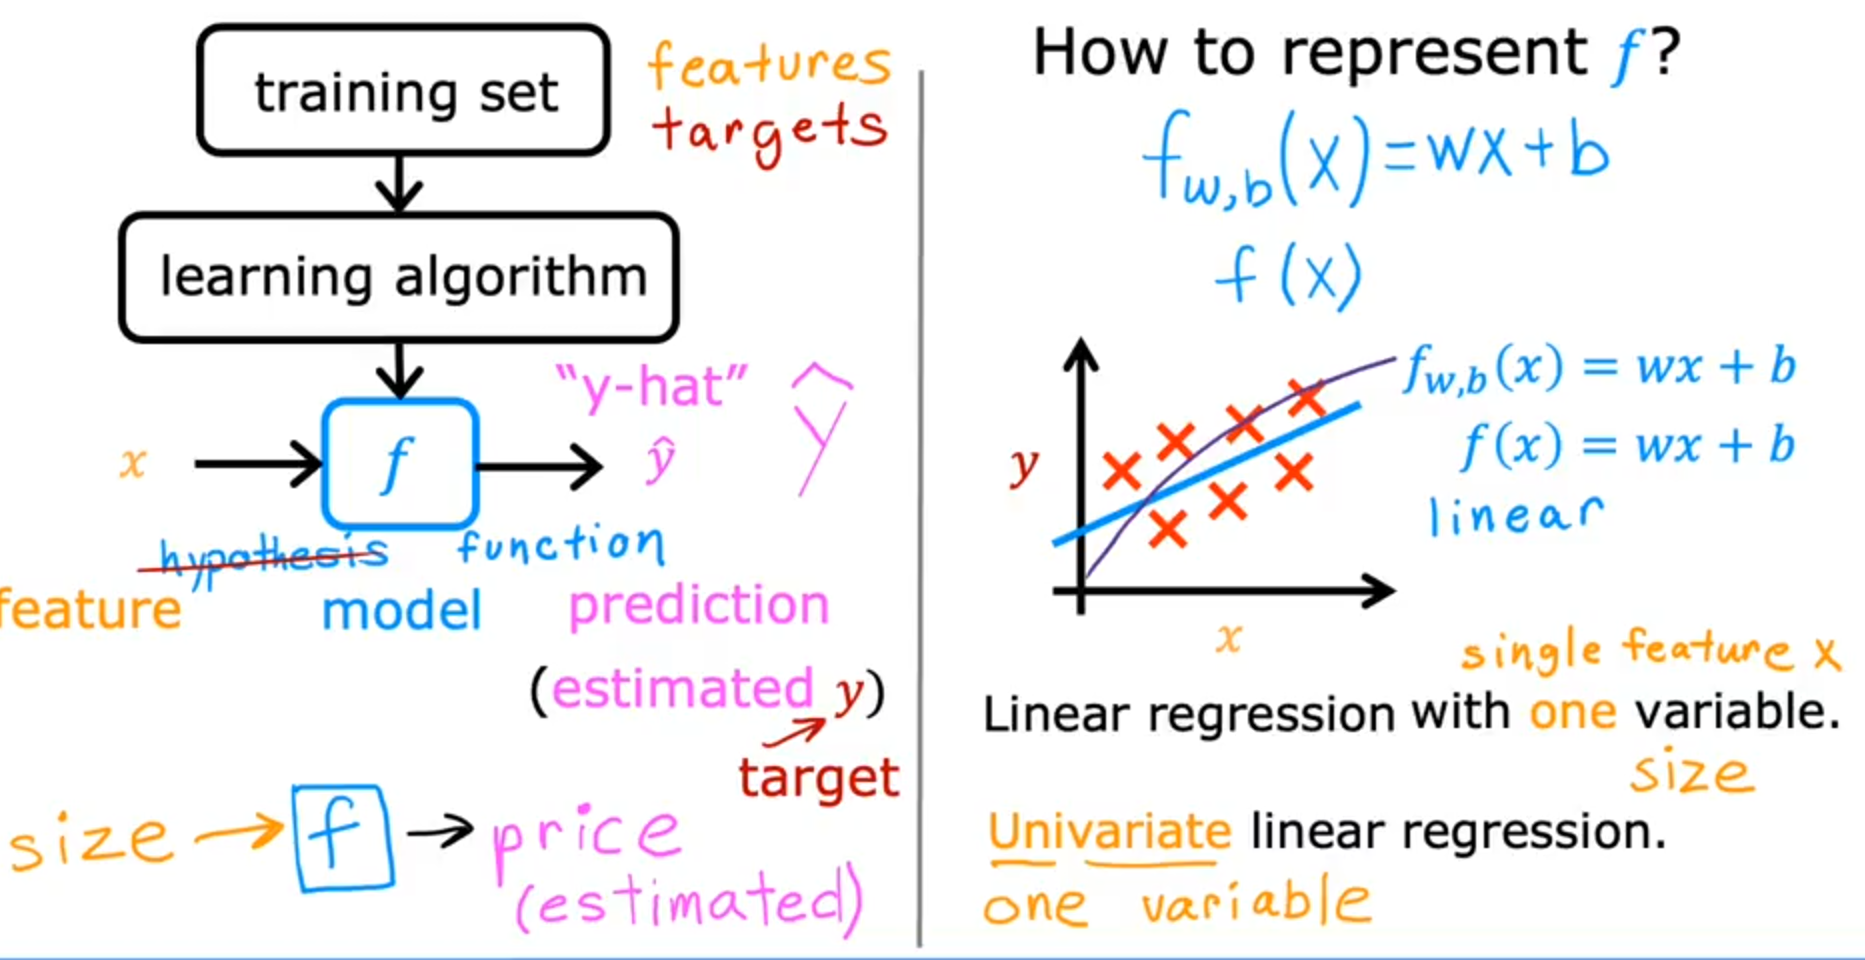


### 📊 **Why Use a Linear Function?**

* It's **simple** and **interpretable**.
* Serves as a **foundation** before moving to more complex **non-linear models** like curves or polynomials.
* When only **one input variable** is used, it’s called **univariate linear regression**.



## **Cost Function**

Here's a **summary** of the explanation about the **cost function in linear regression**:

---

### 🧠 **Purpose of the Cost Function**:

The **cost function** measures how well a linear regression model (a straight-line function) fits the training data.

---

### 📊 **Training Data**:

* You have input features $x$ and output targets $y$.
* The model is $f_{w,b}(x) = wx + b$, where:

  * $w$: weight (slope)
  * $b$: bias (y-intercept)
* $w$ and $b$ are the **parameters** of the model.

---

### 📈 **Effect of Parameters**:

* Different values of $w$ and $b$ change the slope and intercept of the line.
* Example:

  * $w = 0$, $b = 1.5$: flat line at y = 1.5
  * $w = 0.5$, $b = 0$: line through origin with slope 0.5
  * $w = 0.5$, $b = 1$: same slope, higher intercept


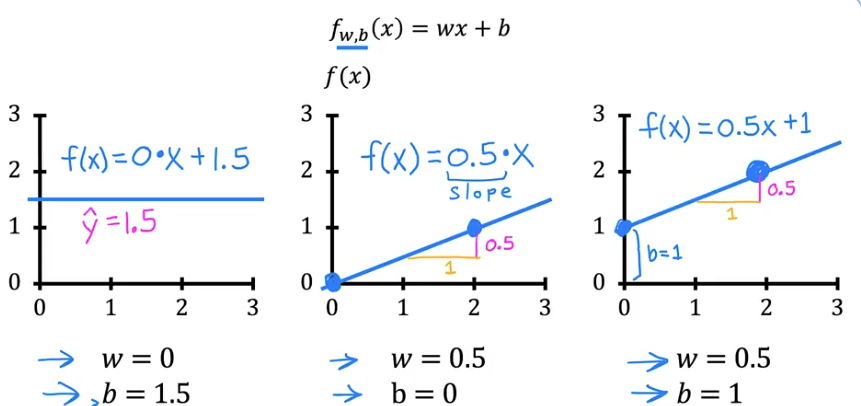


---

### 🎯 **Goal**:

* Choose $w$ and $b$ so the line closely fits the training data.
* This means minimizing the difference between predicted values $\hat{y}$ and true values $y$.

---

### 🧮 **Constructing the Cost Function**:

1. **Prediction error** for each example:

   $$
   \text{error} = \hat{y}^{(i)} - y^{(i)}
   $$
2. **Square the error**:

   $$
   (\hat{y}^{(i)} - y^{(i)})^2
   $$
3. **Sum over all training examples (i = 1 to m)**.
4. **Average the squared error**:

   $$
   \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
   $$
5. **Final Cost Function (J)** — for convention, divide by 2:

   $$
   J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)})^2
   $$

---

### 🔍 **Why Use the Cost Function?**

* It quantifies how far off predictions are from true values.
* **Smaller J(w, b)** means **better-fitting model**.
* Used to **optimize** $w$ and $b$ during training (via gradient descent, covered later).

---

Let me know if you’d like a visual explanation or Python code to compute this!


## **Cost Function Intiution**

Here's a **concise summary** of the above explanation on **cost function in linear regression**:

---

### 🎯 **Goal of Linear Regression:**

To **find the best-fitting straight line** for the training data by choosing parameters `w` and `b` that minimize the **cost function** `J(w, b)`.

---

### 🔍 **What is the Cost Function?**

* The **cost function `J`** measures how well the model’s predictions match the actual target values.
* It uses the **squared error**:

  $$
  J(w) = \frac{1}{2m} \sum_{i=1}^m (f_w(x^i) - y^i)^2
  $$
* Goal: **Minimize J** with respect to `w` (or `w` and `b` in the full model).

---

### 📉 **Simplified Model for Intuition:**

* Consider a simpler version: **`f(x) = w * x`** (i.e., set `b = 0`).
* Try different values of `w` and observe how the line and cost `J(w)` change.

---

### 🧪 **Example with Data Points (1,1), (2,2), (3,3):**

* **w = 1** → Line fits all points perfectly → **J = 0**.
* **w = 0.5** → Underestimates y → Errors exist → **J ≈ 0.58**.
* **w = 0** → Flat line → Larger errors → **J ≈ 2.33**.
* **w = -0.5** → Downward slope → Even worse fit → **J ≈ 5.25**.

---

### 📈 **Visual Insight:**

* For each value of `w`, you get:

  * A straight line (model prediction).
  * A corresponding cost `J(w)`.
* Plotting multiple `J(w)` values gives a **U-shaped curve** showing how cost changes with `w`.

---

### ✅ **Key Takeaway:**

* The **optimal value of `w`** minimizes the cost function `J(w)`.
* In the example, `w = 1` gives **the lowest cost** and **best fit**.
* In full linear regression, we minimize `J(w, b)` over both `w` and `b`.

---

### 📌 Coming Up:

The next video visualizes the cost function for **both `w` and `b`** using **3D plots**, helping to build deeper intuition.

---

Let me know if you want this turned into a video script or slide deck.


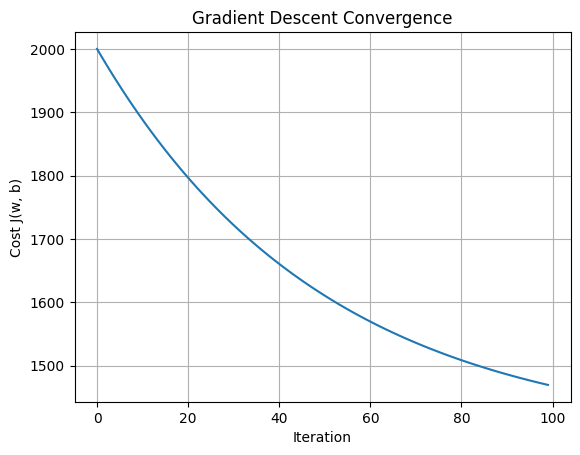

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df = df[['Age', 'Fare']].dropna()

# Normalize features
x = df['Age'].values
y = df['Fare'].values
x = (x - np.mean(x)) / np.std(x)

# Initialize parameters
w, b = 0.0, 0.0
alpha = 0.01
iterations = 100
m = len(x)

cost_history = []

# Gradient Descent
for _ in range(iterations):
    y_pred = w * x + b
    error = y_pred - y
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)

    # Gradients
    dw = (1/m) * np.dot(error, x)
    db = (1/m) * np.sum(error)

    # Update
    w -= alpha * dw
    b -= alpha * db

# Plot cost vs iteration
plt.plot(range(iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost J(w, b)')
plt.title('Gradient Descent Convergence')
plt.grid(True)
plt.show()


## 📌 **What is Simple Linear Regression?**

* A **supervised learning algorithm** used for predicting a **continuous outcome** based on a **single input feature**.
* It models the **linear relationship** between:

  * **Independent variable (X)**: e.g., weight
  * **Dependent variable (Y)**: e.g., height

---

## 🎯 **Goal of Simple Linear Regression**

* To **find a straight line** (best-fit line) that best predicts the output (Y) from the input (X).
* This line minimizes the prediction **error** using the **Least Squares Method**.

---

## 📈 **Equation of the Line**

$$
h_\theta(x) = \theta_0 + \theta_1 \cdot x
$$

* $h_\theta(x)$: Predicted value ( $\hat{y}$ )
* $\theta_0$: Intercept (value when $x = 0$)
* $\theta_1$: Slope (change in $y$ for one unit change in $x$)

---

## 📉 **Error and Cost Function**

* **Residual (Error)**: $y - \hat{y}$
* **Cost Function (Mean Squared Error - MSE)**:

$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$$

* The goal is to **minimize $J(\theta_0, \theta_1)$** to get the best-fitting line.

---

## 🔄 **Gradient Descent for Optimization**

* Gradient descent is used to **minimize the cost function** by iteratively updating $\theta_0$ and $\theta_1$.
* At each step, we move in the direction that **reduces the cost** the most (negative gradient).

---

## 🧪 **Example Summary**

### Dataset:

* (1, 1), (2, 2), (3, 3)

### Case 1: $\theta_1 = 1$

* Perfect fit: predicted = actual → **Cost = 0**

### Case 2: $\theta_1 = 0.5$

* Predictions are off → **Cost = 0.583**

This shows how **different values of $\theta_1$** affect the model’s **accuracy**.

---

## 🧠 **Key Takeaways**

* Simple Linear Regression is a **foundation for more advanced models**.
* It teaches core ideas like **modeling**, **cost minimization**, and **gradient-based optimization**.
* Understanding this is essential before moving to **multiple regression**, **regularization**, or **neural networks**.

Here's a concise summary of the explanation you provided:

---

### 🎯 **Goal of the Video**

To build **intuition about the cost function** in linear regression by using a simplified example where the model is:

$$
f_w(x) = w \cdot x \quad (\text{bias } b = 0)
$$

---

### 🧠 **Key Concepts Explained**

* **Model Parameters**: $w$ (and in general, $b$)
* **Objective**: Find the value of $w$ that **minimizes the cost function** $J(w)$, which measures how well the model predictions match the actual data.

---

### 🔍 **Simplified Setup**

* **Data Points**: (1,1), (2,2), (3,3)
* **Cost Function**:

  $$
  J(w) = \frac{1}{2m} \sum_{i=1}^{m} (f_w(x^{(i)}) - y^{(i)})^2
  $$

  with $f_w(x) = w \cdot x$, and $m = 3$

---

### 📉 **Examples of w and Corresponding Cost**

| $w$  | Model Line                             | Error Summary                | $J(w)$ |
| ---- | -------------------------------------- | ---------------------------- | ------ |
| 1    | Perfect fit: passes through all points | All errors = 0               | 0      |
| 0.5  | Underestimates y values                | Squared errors add up to 3.5 | \~0.58 |
| 0    | Flat line on x-axis                    | Errors: 1² + 2² + 3² = 14    | \~2.33 |
| -0.5 | Downward sloping line                  | Even higher error            | \~5.25 |

---

### 📊 **Visualization Insights**

* **Left Plot**: Different values of $w$ produce different lines on the data.
* **Right Plot**: Corresponding values of $J(w)$ for each line.
* The cost function $J(w)$ creates a **convex curve**—minimum occurs where the line fits the data best.


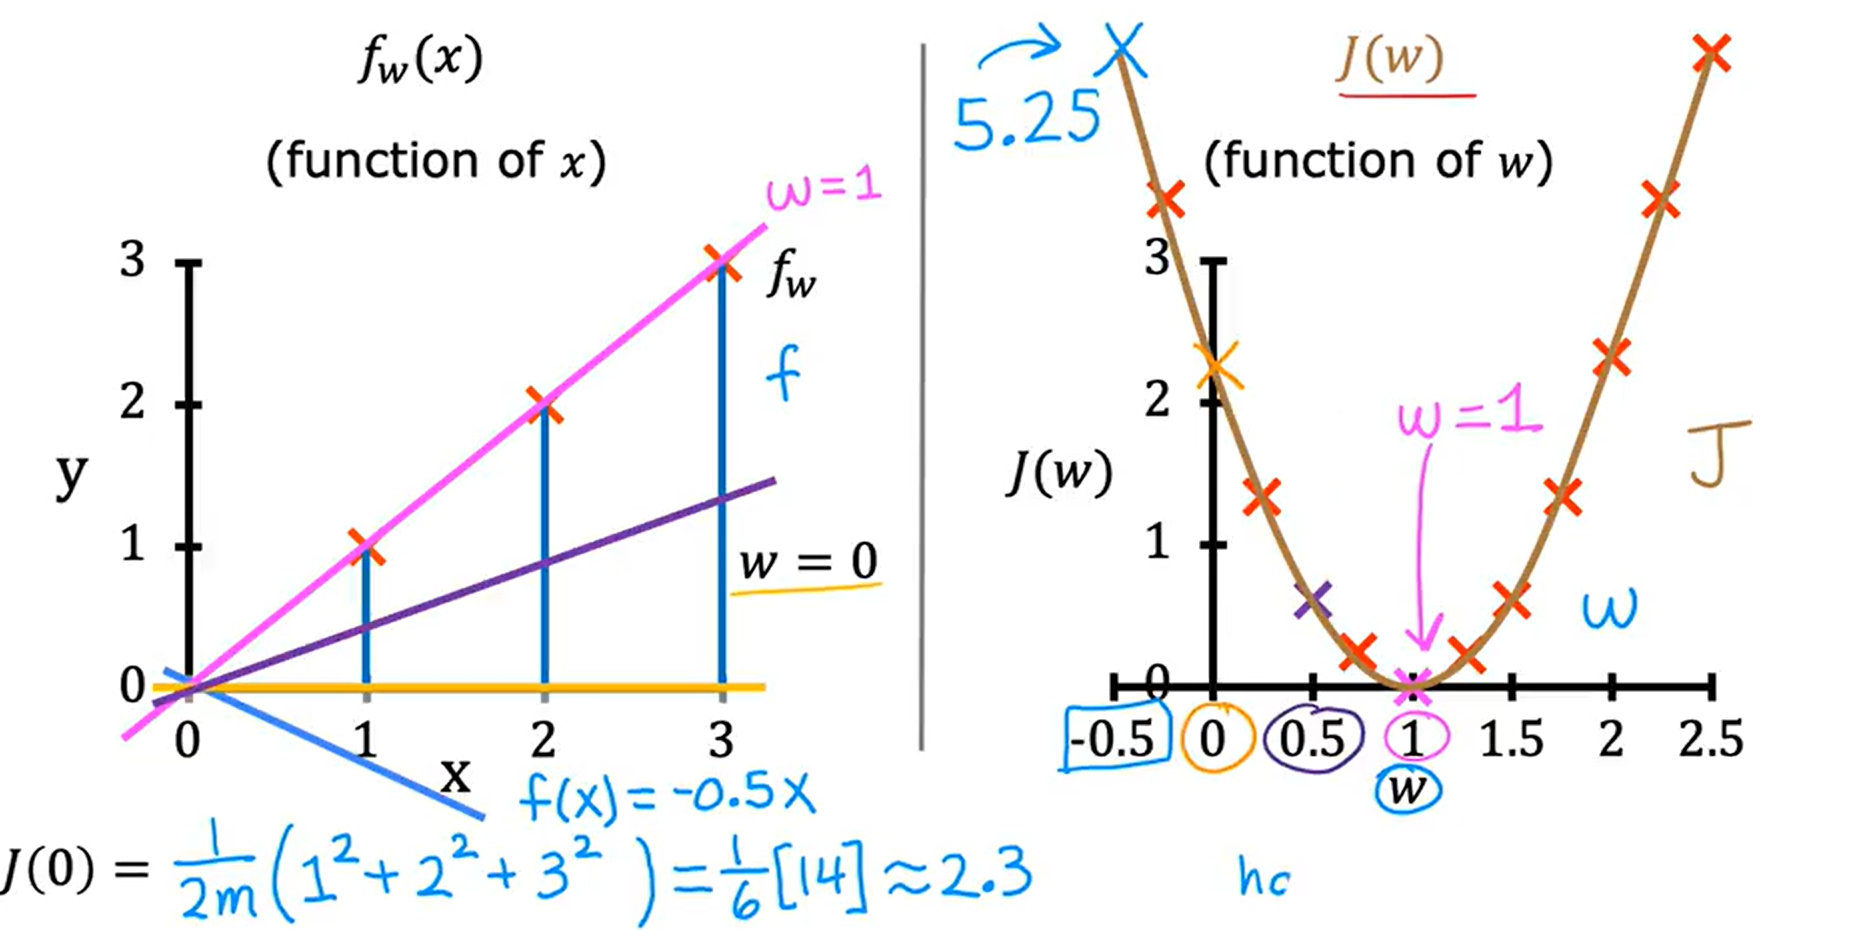

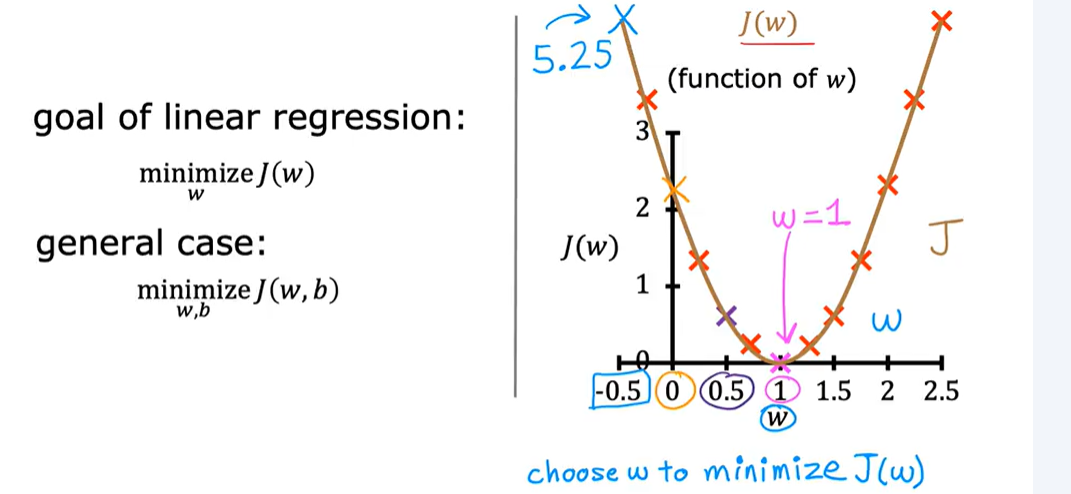


---

### 🏁 **Conclusion**

* The **cost function quantifies the fit** of the model.
* **Linear regression** aims to **find the w** (and b, in general) that **minimizes J**.
* This example used only one parameter (w), but the same idea applies to models with both w and b.



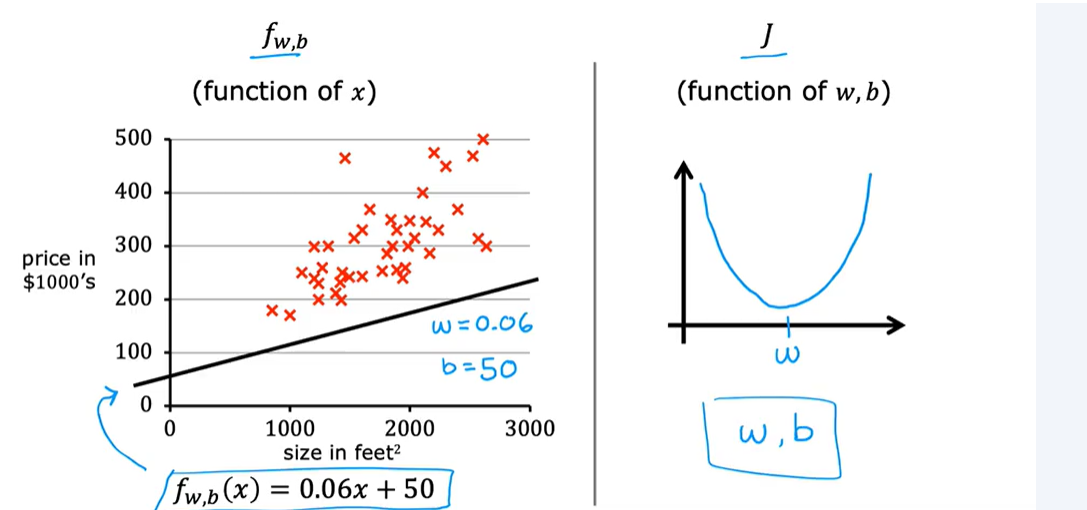

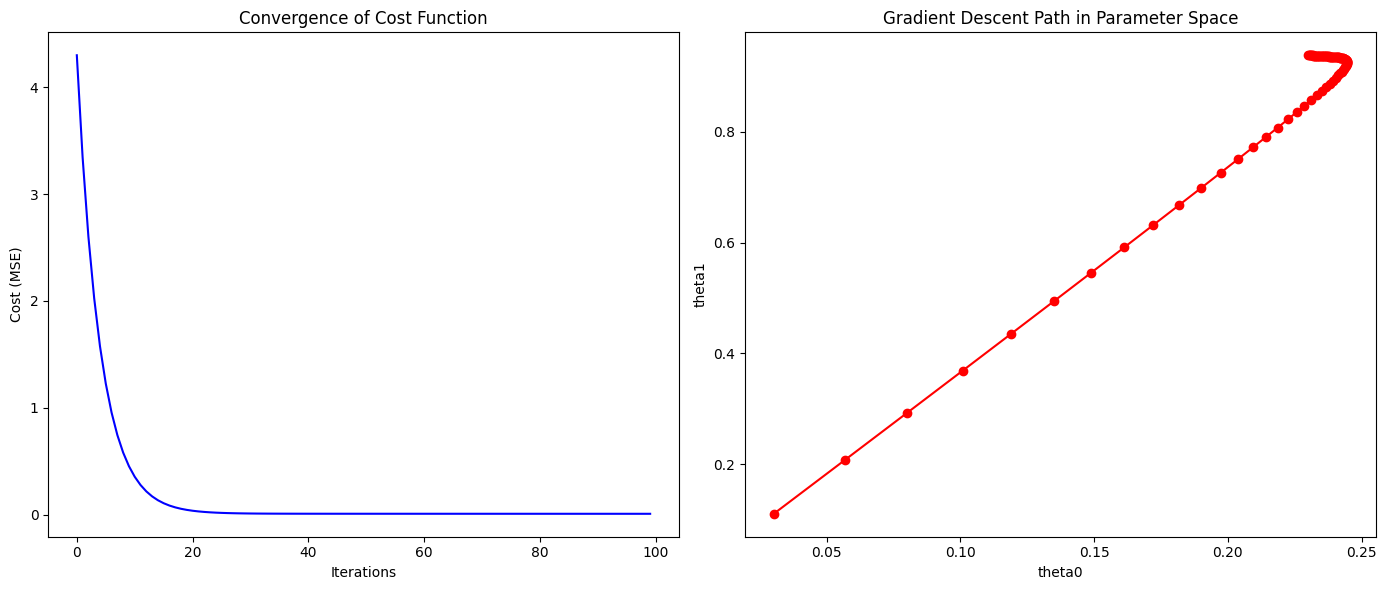

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data
X = np.array([1, 2, 3, 4, 5])
y = np.array([1.2, 1.9, 3.0, 3.9, 5.1])
m = len(X)

# Initialize theta values
theta0, theta1 = 0.0, 0.0
alpha = 0.01
iterations = 100

# Store history
theta0_hist = []
theta1_hist = []
cost_hist = []

# Hypothesis function
def hypothesis(X, theta0, theta1):
    return theta0 + theta1 * X

# Cost function (MSE)
def compute_cost(X, y, theta0, theta1):
    predictions = hypothesis(X, theta0, theta1)
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

# Gradient Descent
for _ in range(iterations):
    predictions = hypothesis(X, theta0, theta1)
    errors = predictions - y

    # Compute gradients
    d_theta0 = (1 / m) * np.sum(errors)
    d_theta1 = (1 / m) * np.sum(errors * X)

    # Update parameters
    theta0 -= alpha * d_theta0
    theta1 -= alpha * d_theta1

    # Record history
    theta0_hist.append(theta0)
    theta1_hist.append(theta1)
    cost_hist.append(compute_cost(X, y, theta0, theta1))

# Create figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot cost over iterations (convergence)
axs[0].plot(range(iterations), cost_hist, color='blue')
axs[0].set_title("Convergence of Cost Function")
axs[0].set_xlabel("Iterations")
axs[0].set_ylabel("Cost (MSE)")

# Plot gradient descent path in parameter space
axs[1].plot(theta0_hist, theta1_hist, marker='o', color='red')
axs[1].set_title("Gradient Descent Path in Parameter Space")
axs[1].set_xlabel("theta0")
axs[1].set_ylabel("theta1")

plt.tight_layout()
plt.show()


Here’s a **visual explanation of gradient descent and the convergence algorithm** based on the generated plots:

---

### 🔁 Plot 1: **Convergence of Cost Function**

* **X-axis**: Number of iterations
* **Y-axis**: Cost function value (MSE)

#### What it shows:

* The curve **decreases smoothly**, showing that the algorithm is **minimizing the error**.
* Each point represents a step in which we adjusted the parameters $\theta_0$ and $\theta_1$.
* Eventually, the cost stops decreasing significantly → this is called **convergence**.

---

### 🗺️ Plot 2: **Gradient Descent Path in Parameter Space**

* **X-axis**: $\theta_0$ (intercept)
* **Y-axis**: $\theta_1$ (slope)

#### What it shows:

* This plot traces the **path of parameter updates** during gradient descent.
* It starts with the initial guess $(0, 0)$ and gradually **steps toward the optimal values**.
* The curve moves in a **spiral-like or direct inward path**, showing how the parameters move toward minimizing the cost function.

---

### 🧠 Summary of What’s Happening

1. **Gradient Descent** uses the slope (derivative) of the cost function to update $\theta_0$ and $\theta_1$.
2. The **learning rate $\alpha$** controls how big each step is.
3. As you iterate:

   * The **cost decreases** (left plot).
   * The **parameters converge** to values that minimize the cost (right plot).

---

Would you like a 3D surface and contour plot to **visualize the cost landscape** that gradient descent is "rolling down"?


Here's a **summary** of the key points covered in your explanation of **gradient descent and evaluation metrics** in linear regression:

---

### 🔁 **Gradient Descent and Convergence Algorithm**

* **Purpose**: Optimize parameters (θ₀, θ₁) to minimize the cost function $J(\theta)$, helping the model find the best-fit line.

* **Update Rule**:

  $$
  \theta_j := \theta_j - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_j}
  $$

  * $\theta_j$: Current parameter (slope/intercept)
  * $\alpha$: Learning rate (controls step size)
  * $\frac{\partial J}{\partial \theta_j}$: Gradient (slope) at current point

* **Learning Rate (α)**:

  * Too **small** → slow convergence
  * Too **large** → overshooting, no convergence
  * Recommended values: 0.001, 0.01, etc.

* **Gradient Interpretation**:

  * Positive gradient → decrease θ
  * Negative gradient → increase θ

* **Convergence**:

  * Repeats until changes in θ are minimal (i.e., reaching the global minimum)

---

### 📈 **Cost Function and Parameter Updates in Linear Regression**

* **Cost Function (MSE-based)**:

  $$
  J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x_i) - y_i)^2
  $$

  where $h_\theta(x_i) = \theta_0 + \theta_1 x_i$

* **Partial Derivatives**:

  * For $\theta_0$:

    $$
    \frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum (h_\theta(x_i) - y_i)
    $$
  * For $\theta_1$:

    $$
    \frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum (h_\theta(x_i) - y_i) \cdot x_i
    $$

* **Update Rules**:

  $$
  \theta_0 := \theta_0 - \alpha \cdot \text{(gradient w.r.t } \theta_0)
  $$

  $$
  \theta_1 := \theta_1 - \alpha \cdot \text{(gradient w.r.t } \theta_1)
  $$

* **Visualization**: Think of gradient descent like a ball rolling down a curved bowl to the lowest point (global minimum).

---

### 📊 **Regression Evaluation Metrics**
Here is the **refactored and corrected version** of the table with consistent formatting and accurate information in each column:

| **Metric** | **Formula**                                     | **Robust to Outliers**   | **Units**      | **Differentiable** | **Notes**                     |             |                         |
| ---------- | ----------------------------------------------- | ------------------------ | -------------- | ------------------ | ----------------------------- | ----------- | ----------------------- |
| **MSE**    | $\frac{1}{n} \sum (y_i - \hat{y}_i)^2$          | ❌ No                     | Squared units  | ✅ Yes              | Amplifies large errors |        
| **MAE**    | $$\frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right |$$          | ✅ Yes              | Same as target                | ❌ No (at 0) | More robust to outliers |
| **RMSE**   | $\sqrt{ \frac{1}{n} \sum (y_i - \hat{y}_i)^2 }$ | ❌ No (less than MSE)     | Same as target | ✅ Yes              | Balanced; interpretable units |             |                         |

Let me know if you'd like a Markdown version for video slides or a LaTeX table for PDFs.


* **MSE**: Sensitive to outliers, good for gradient descent due to differentiability.
* **MAE**: Robust to outliers, easier to interpret, but less friendly to optimization.
* **RMSE**: Balances MSE and MAE—interpretable units with moderate outlier sensitivity.

---

### ✅ **When to Use What?**

* **MSE**: Best for training models with gradient descent.
* **MAE**: When data contains **outliers** and interpretability matters.
* **RMSE**: A **middle ground** when you want interpretability but can accept some sensitivity.

---

Let me know if you'd like this visualized in a diagram or need slides for your video!
